In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

In [2]:
# import model vit_minst
import vit_tests

model: tf.keras.Model = tf.keras.models.load_model('./vit_cifar100',
                                                custom_objects={
                                                            'MLP': vit_tests.MLP,
                                                            'PatchEncoder': vit_tests.PatchEncoder,
                                                            'Patches': vit_tests.Patches,
                                                            'VisionTransformer': vit_tests.VisionTransformer,
                                                    }
                                                ) # type: ignore

model.summary()

Model: "vision_transformer"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 patches (Patches)           multiple                  0         
                                                                 
 patch_encoder (PatchEncoder  multiple                 3616      
 )                                                               
                                                                 
 layer_normalization (LayerN  multiple                 64        
 ormalization)                                                   
                                                                 
 multi_head_attention (Multi  multiple                 33568     
 HeadAttention)                                                  
                                                                 
 add (Add)                   multiple                  0         
                                                

# Transform 16x16 patch using dense layer?

In [3]:
model.layers

In [4]:
# output shape
[var.name for var in model.layers[2].variables]

['layer_normalization/gamma:0', 'layer_normalization/beta:0']

In [5]:
# check shapes
for var in model.layers[2].variables:
    print(var.name, var.shape)

layer_normalization/gamma:0 (32,)
layer_normalization/beta:0 (32,)


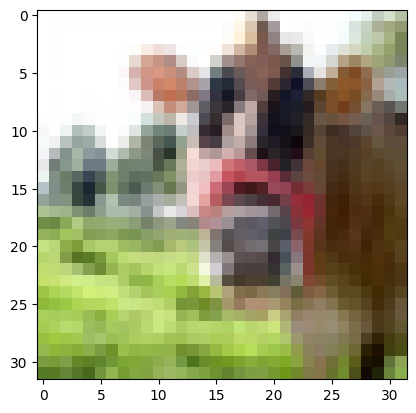

In [6]:
train, test = keras.datasets.cifar100.load_data()

x_train, y_train = train

y_train = y_train.astype("float32")

x_train = x_train / 255.0

x_train = x_train.reshape(x_train.shape[0], 32, 32, 3)

x_test, y_test = test

x_test = x_test / 255.0

x_test = x_test.reshape(x_test.shape[0], 32, 32, 3)

y_test = y_test.astype("float32")


import matplotlib.pyplot as plt

sample = x_train[0].reshape(32, 32, 3)

plt.imshow(sample)

(8, 64, 64)
(64, 64)
(8, 64, 64)
(64, 64)
(8, 64, 64)
(64, 64)
(8, 64, 64)
(64, 64)
(8, 64, 64)
(64, 64)
(8, 64, 64)
(64, 64)
(8, 64, 64)
(64, 64)
(8, 64, 64)
(64, 64)
(8, 64, 64)
(64, 64)
(8, 64, 64)
(64, 64)


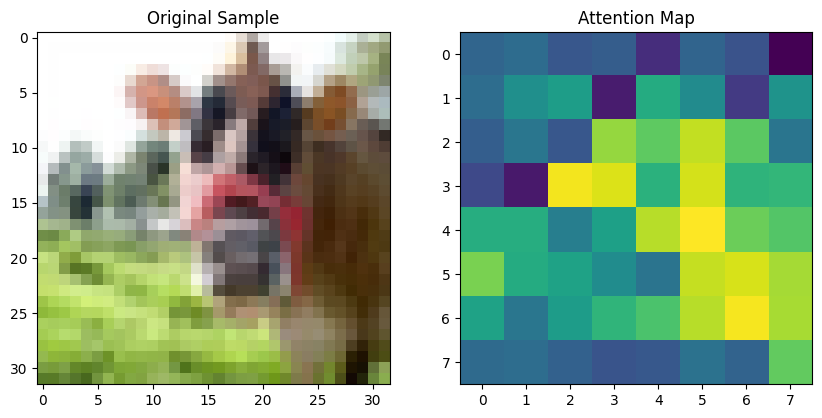

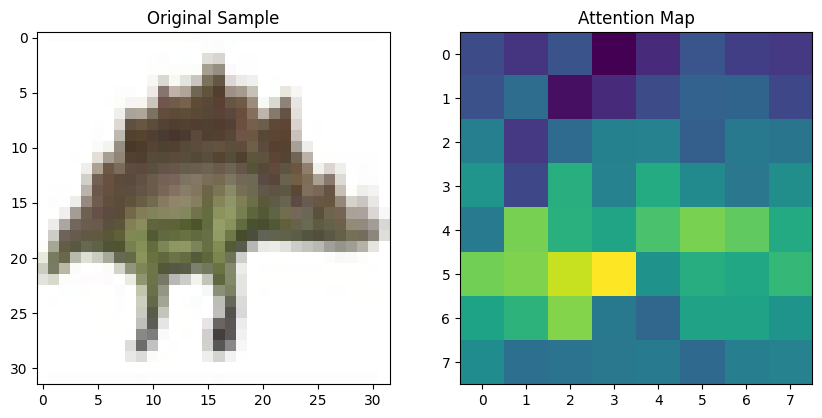

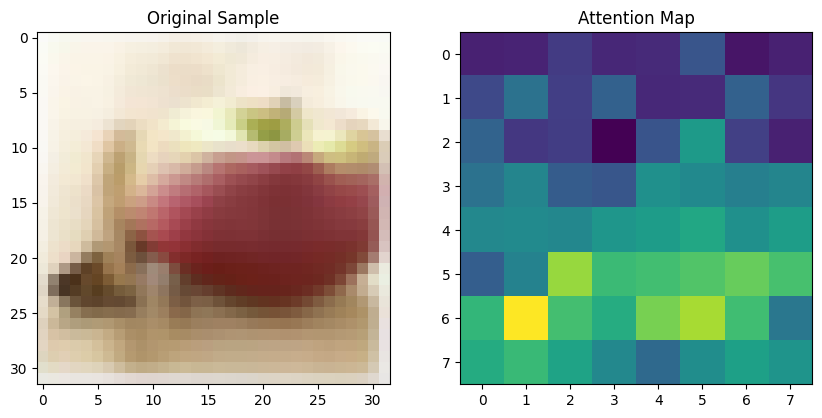

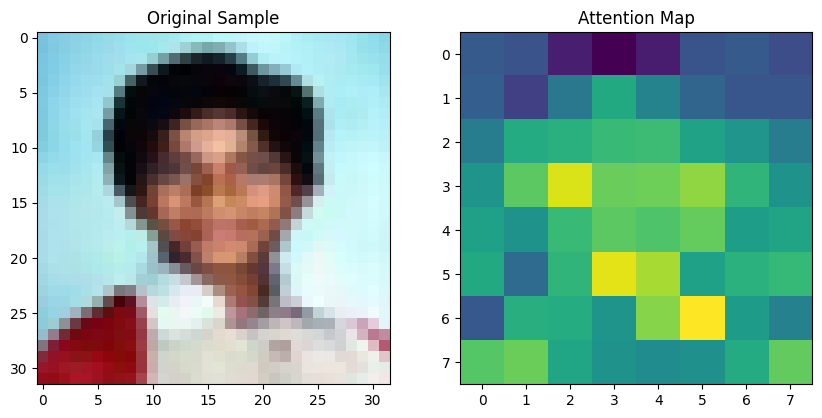

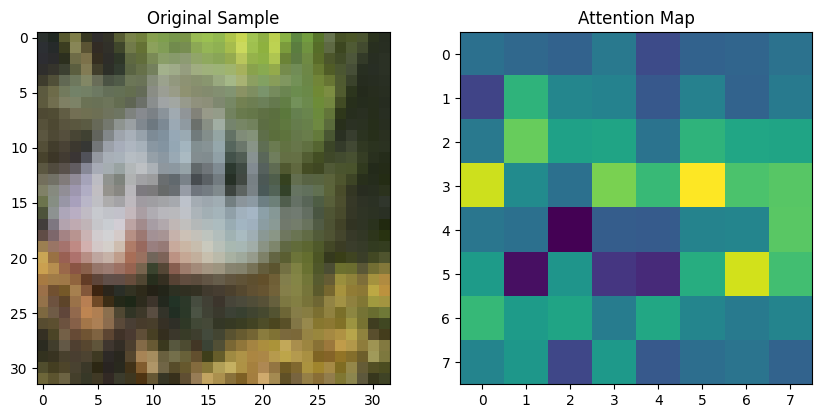

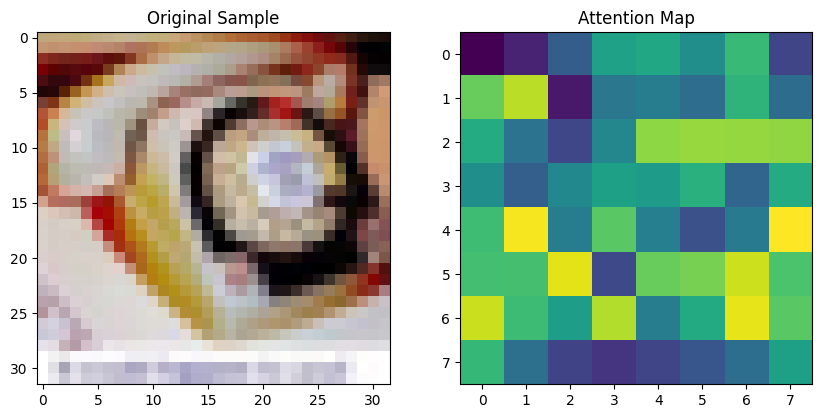

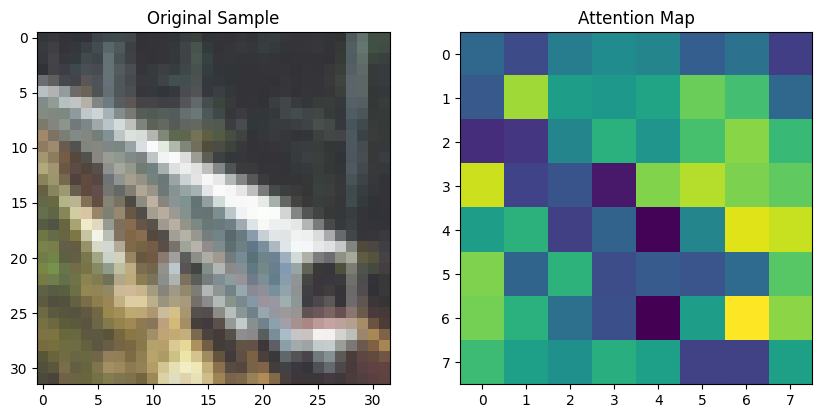

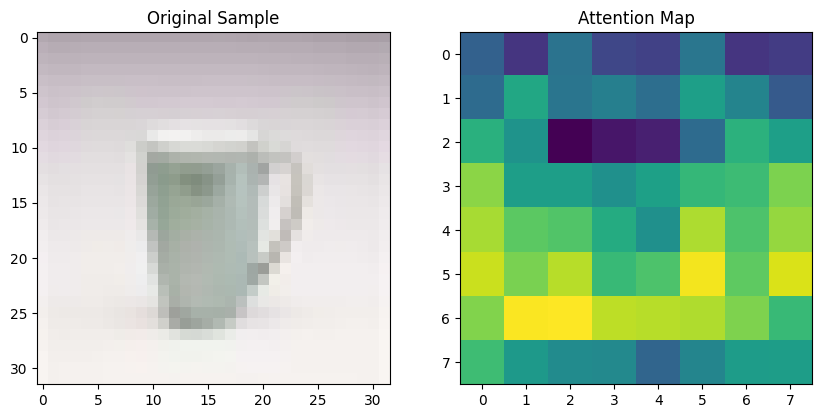

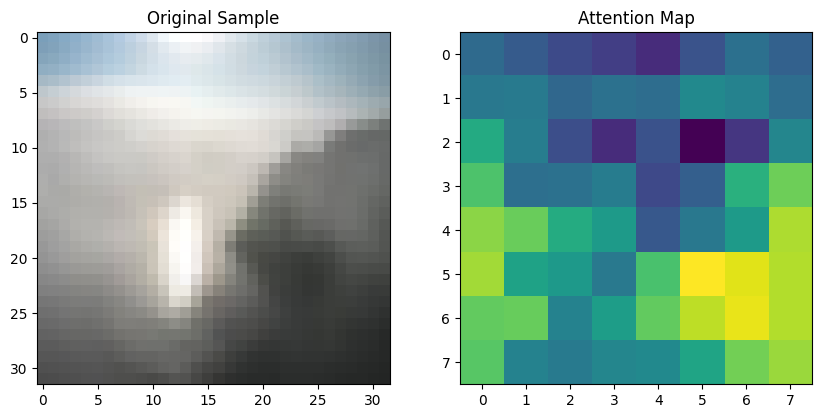

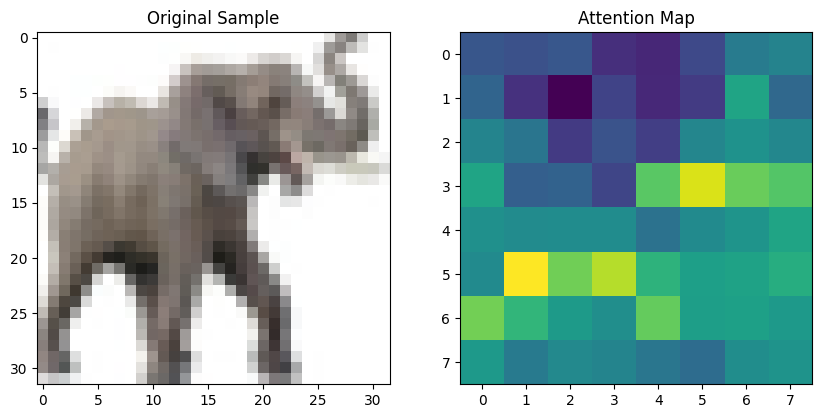

In [8]:
for i in range(10):
    sample = x_train[i].reshape(1, 32, 32, 3)

    plt.figure(figsize=(10, 5))

    # First plot: Original sample
    plt.subplot(1, 2, 1)
    plt.imshow(sample.reshape(32, 32, 3), cmap='gray')
    plt.title('Original Sample')

    # Second plot: Attention map
    attentions = model.compute_attention_map(sample)[0][0]
    print(attentions.shape)
    numpy = np.mean(attentions.numpy(), axis=0)
    #numpy = attentions.numpy()[4]
    print(numpy.shape)
    plt.subplot(1, 2, 2)
    plt.imshow(np.mean(numpy, axis=0).reshape(8, 8), cmap='viridis')
    plt.title('Attention Map')

plt.show()